In [2]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d

In [3]:
def schwefel(x):
    return np.sum(np.abs(x),0)+np.prod(np.abs(x),0)

def kamel(x):
    return (4-2.1*x[0,:]**2+x[0,:]**4/3)*x[0,:]**2+x[0,:]*x[1,:]+(-4+4*x[1,:]**2)*x[1,:]**2

def create_mesh(x,y):
    X, Y = np.meshgrid(x,y)
    D = np.array((X,Y))
    return (X,Y,D)

In [4]:
# Grid
n_grid = 100
x_grid = np.linspace(-2,2,n_grid)
y_grid = np.linspace(-1,1,n_grid)
X, Y, D = create_mesh(x_grid,y_grid)
Z = kamel(D)

# Samples
n_samples = 10
x_samples = np.random.choice(x_grid, size = n_samples)
y_samples = np.random.choice(y_grid, size = n_samples)
d = np.array((x_samples, y_samples))
z = kamel(d).reshape(1,n_samples)

In [5]:
print(D.shape)
print(Z.shape)
print(d.shape)
print(z.shape)

(2, 100, 100)
(100, 100)
(2, 10)
(1, 10)


In [6]:
D_vec = D.reshape(2,n_grid*n_grid).T
Z_vec = Z.reshape(1,n_grid*n_grid).T
print(D_vec.shape)
print(Z_vec.shape)

(10000, 2)
(10000, 1)


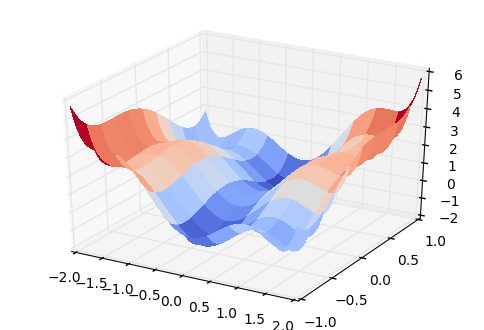

In [7]:
fig = plt.figure()

ax1 = fig.add_subplot(111, projection='3d')
surf = ax1.plot_surface(X, Y, Z, cmap=cm.coolwarm, 
                       linewidth=0, antialiased=False)
plt.show()

In [8]:
# Define Model
x = tf.placeholder(shape=[None, 2],dtype=tf.float32)
y = tf.placeholder(shape=[None, 1],dtype=tf.float32)

W_1 = tf.Variable(tf.truncated_normal(shape=[2, 127],stddev=0.5))
b_1 = tf.Variable(tf.truncated_normal([127],stddev=0.5))
W_2 = tf.Variable(tf.truncated_normal([127, 127],stddev=0.5))
b_2 = tf.Variable(tf.truncated_normal([127],stddev=0.5))
W_out = tf.Variable(tf.truncated_normal([127, 1],stddev=0.5))
b_out = tf.Variable(tf.truncated_normal([1],stddev=0.5))

y_predict = tf.matmul(tf.sigmoid(tf.matmul(tf.sigmoid(tf.matmul(x, W_1)+b_1), W_2) + b_2),W_out)+b_out

In [9]:
# Cost Function
error = tf.reduce_mean(tf.square(y_predict-y))

# Optimizer
train_step = tf.train.AdamOptimizer().minimize(error)

In [10]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

In [11]:
for ep in range(8000):
    if ep%1000 == 0:     
        err = sess.run([error],feed_dict={x:d.T,y:z.T})
        print("Epoch: "+str(ep)+" Error: "+str(err))
        
    sess.run(train_step,feed_dict={x:d.T,y:z.T})    
print("Epoch: "+str(ep)+" Error: "+str(err))

Epoch: 0 Error: [4.0287633]
Epoch: 1000 Error: [0.0053737205]
Epoch: 2000 Error: [0.00017456259]
Epoch: 3000 Error: [8.6194831e-07]
Epoch: 4000 Error: [7.6135764e-09]
Epoch: 5000 Error: [1.1569798e-09]
Epoch: 6000 Error: [2.9337559e-09]
Epoch: 7000 Error: [4.0031978e-11]
Epoch: 7999 Error: [4.0031978e-11]


In [12]:
Z_p = sess.run(y_predict, feed_dict={x:D_vec})

In [13]:
Z_p.shape

(10000, 1)

In [14]:
Z_p = Z_p.reshape(n_grid,n_grid)

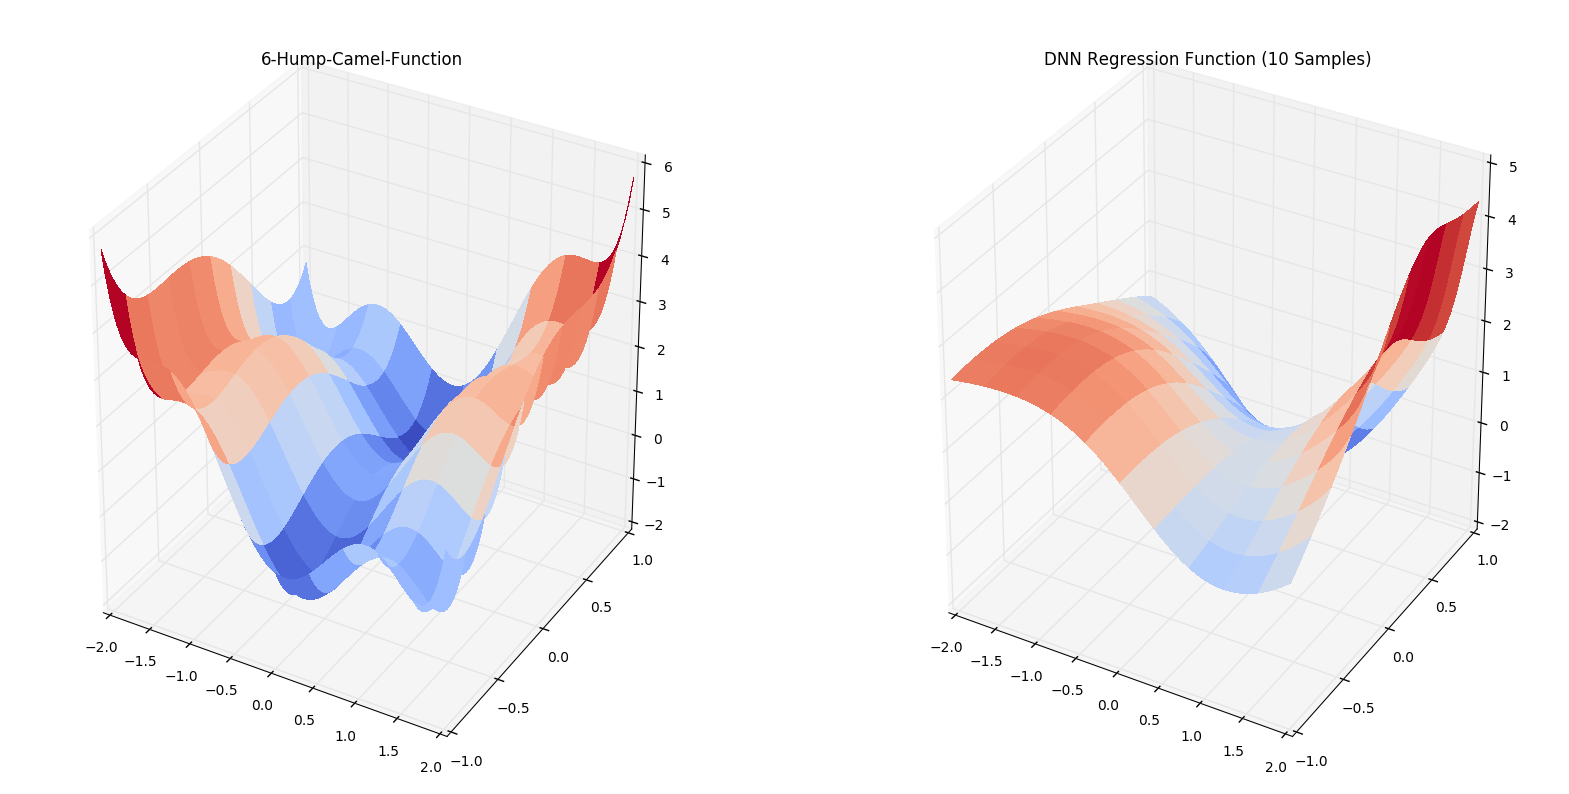

In [15]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(X, Y, Z, cmap=cm.coolwarm, 
                       linewidth=0, antialiased=False)
plt.title("6-Hump-Camel-Function")

ax2 = fig.add_subplot(122, projection='3d')
surf = ax2.plot_surface(X, Y, Z_p, cmap=cm.coolwarm, 
                       linewidth=0, antialiased=False)
plt.title("DNN Regression Function (10 Samples)")

plt.show()